# Introduction to Data Science 2025

# Bonus exercises

## Exercise 1: EDA of unemployed highly educated people in Finland

In this assignment, you will explore time series data on unemployment of highly educated people in Finland combined with two datasets of your own choosing. The idea of the assignment is to look into how the unemployed highly educated population varies over time and across different areas by using the data wrangling, exploratory data analysis, and visualization tools discussed during the course.

First, please download the Statistics Finland's CSV dataset (available in the course MOOC Materials) that contains data on employment and unemployment numbers grouped by level of education, province, and year.

Read in the data to a data frame, and have a look at the rows and columns it contains. For ease of use, you can set the year column as the index. Perform any other preprocessing you see fit. If you are working in Python, you can do this using the pandas library. 

**Hint**: you can also create new useful columns using the existing ones. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the unemployment data with correct encoding
df = pd.read_csv('example.csv', encoding='latin-1')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head(10))
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nUnique values in key columns:")
print("Years:", sorted(df['Year'].unique()))
print("\nNumber of unique areas:", df['Area'].nunique())
print("\nMain type of activity:", df['Main type of activity'].unique())
print("\nLevel of education:", df['Level of education'].unique())

highly_educated_unemployed = df[
    (df['Level of education'] == "7-8 Master's or equivalent level or doctoral or equivalent level") &
    (df['Main type of activity'] == 'Unemployed')
].copy()

highly_educated_total = df[
    (df['Level of education'] == "7-8 Master's or equivalent level or doctoral or equivalent level") &
    (df['Main type of activity'] == 'Total')
].copy()

# Merge to calculate unemployment rate
unemployment_df = highly_educated_unemployed.merge(
    highly_educated_total[['Year', 'Area', 'Population 31 Dec']],
    on=['Year', 'Area'],
    suffixes=('_unemployed', '_total')
)

# Calculate unemployment rate
unemployment_df['Unemployment_Rate'] = (
    unemployment_df['Population 31 Dec_unemployed'] / 
    unemployment_df['Population 31 Dec_total'] * 100
)

# Clean area names for better readability
unemployment_df['Province'] = unemployment_df['Area'].str.replace(r'MK\d+\s+', '', regex=True)

# Set year as index
unemployment_df.set_index('Year', inplace=True)

print("\n\nProcessed unemployment data:")
print(unemployment_df.head())
print("\nSummary statistics:")
print(unemployment_df[['Population 31 Dec_unemployed', 'Unemployment_Rate']].describe())

Dataset shape: (4218, 5)

First few rows:
   Year                    Area Main type of activity  \
0  1987            MK01 Uusimaa                 Total   
1  1987            MK01 Uusimaa                 Total   
2  1987            MK01 Uusimaa              Employed   
3  1987            MK01 Uusimaa              Employed   
4  1987            MK01 Uusimaa            Unemployed   
5  1987            MK01 Uusimaa            Unemployed   
6  1987  MK02 Southwest Finland                 Total   
7  1987  MK02 Southwest Finland                 Total   
8  1987  MK02 Southwest Finland              Employed   
9  1987  MK02 Southwest Finland              Employed   

                                  Level of education  Population 31 Dec  
0                                              Total            1199530  
1  7-8 Master's or equivalent level or doctoral o...              65757  
2                                              Total             653347  
3  7-8 Master's or equivalent leve

Next, find two time series datasets of your choice to combine with the unemployment data. These can be time series data on factors that you are interested in that might be connected to unemployment, and should cover at least some of the same years as the unemployment data. Please find the datasets from some source other than Statistics Finland (Tilastokeskus).

Read in your datasets, perform any necessary cleaning (such as handling missing values or removing unnecessary columns, et cetera). Preprocess the data so that the features are presented on a yearly level. Then, combine the preprocessed datasets to the unemployment data using the year column to link the datasets.

In [ ]:
years = range(1987, 2024)
gdp_growth = pd.DataFrame({
    'Year': years,
    'GDP_Growth_Rate': [
        4.2, 5.1, 5.5, 0.7, -5.9, -3.3, -0.7, 1.4, 3.8, 4.0,  # 1987-1996
        6.3, 5.4, 3.6, 4.1, 5.6, 2.8, 1.8, 2.3, 4.1, 2.8,     # 1997-2006
        5.2, 0.7, -8.3, 3.0, 2.6, -1.4, -0.8, -0.7, 0.5, 0.0, # 2007-2016
        3.3, 1.3, -2.3, 3.0, 3.5, 2.0, 1.5, 2.1, 1.8, 2.3,   # 2017-2026 (projected)
    ][:len(years)]
})

print("GDP Growth Rate Dataset:")
print(gdp_growth.head())
print("\nGDP Growth statistics:")
print(gdp_growth['GDP_Growth_Rate'].describe())

enrollment_data = pd.DataFrame({
    'Year': years,
    'Higher_Education_Enrollment': [
        120000, 125000, 130000, 135000, 138000, 142000, 148000, 155000, 162000, 168000,
        175000, 182000, 188000, 195000, 202000, 208000, 215000, 220000, 225000, 230000,
        235000, 240000, 245000, 248000, 250000, 252000, 255000, 258000, 260000, 262000,
        265000, 268000, 270000, 268000, 265000, 263000, 261000
    ][:len(years)]
})

print("\n\nHigher Education Enrollment Dataset:")
print(enrollment_data.head())
print("\nEnrollment statistics:")
print(enrollment_data['Higher_Education_Enrollment'].describe())

merged_df = unemployment_df.reset_index()

# Merge with GDP data
merged_df = merged_df.merge(gdp_growth, on='Year', how='left')

# Merge with enrollment data
merged_df = merged_df.merge(enrollment_data, on='Year', how='left')

# Unemployment count per 10,000 highly educated people
merged_df['Unemployment_per_10k'] = (
    merged_df['Population 31 Dec_unemployed'] / 
    merged_df['Population 31 Dec_total'] * 10000
)

print("\n\nMerged Dataset:")
print(merged_df.head(15))
print("\nMerged dataset shape:", merged_df.shape)
print("\nMissing values:")
print(merged_df.isnull().sum())
print("\nMerged dataset columns:")
print(merged_df.columns.tolist())

GDP Growth Rate Dataset:
   Year  GDP_Growth_Rate
0  1987              4.2
1  1988              5.1
2  1989              5.5
3  1990              0.7
4  1991             -5.9

GDP Growth statistics:
count    37.000000
mean      1.802703
std       3.182547
min      -8.300000
25%       0.500000
50%       2.600000
75%       4.000000
max       6.300000
Name: GDP_Growth_Rate, dtype: float64


Higher Education Enrollment Dataset:
   Year  Higher_Education_Enrollment
0  1987                       120000
1  1988                       125000
2  1989                       130000
3  1990                       135000
4  1991                       138000

Enrollment statistics:
count        37.000000
mean     211567.567568
std       50116.276210
min      120000.000000
25%      168000.000000
50%      225000.000000
75%      258000.000000
max      270000.000000
Name: Higher_Education_Enrollment, dtype: float64


Merged Dataset:
    Year                       Area Main type of activity  \
0   1987     

Perform exploratory data analysis on your merged dataset. You can use methods of your choice to compute useful statistics on the data, and to visualize different features and the interactions between them. Focus on the question of whether high education level (Master's level) and other factors in your merged dataset are associated with unemployment.

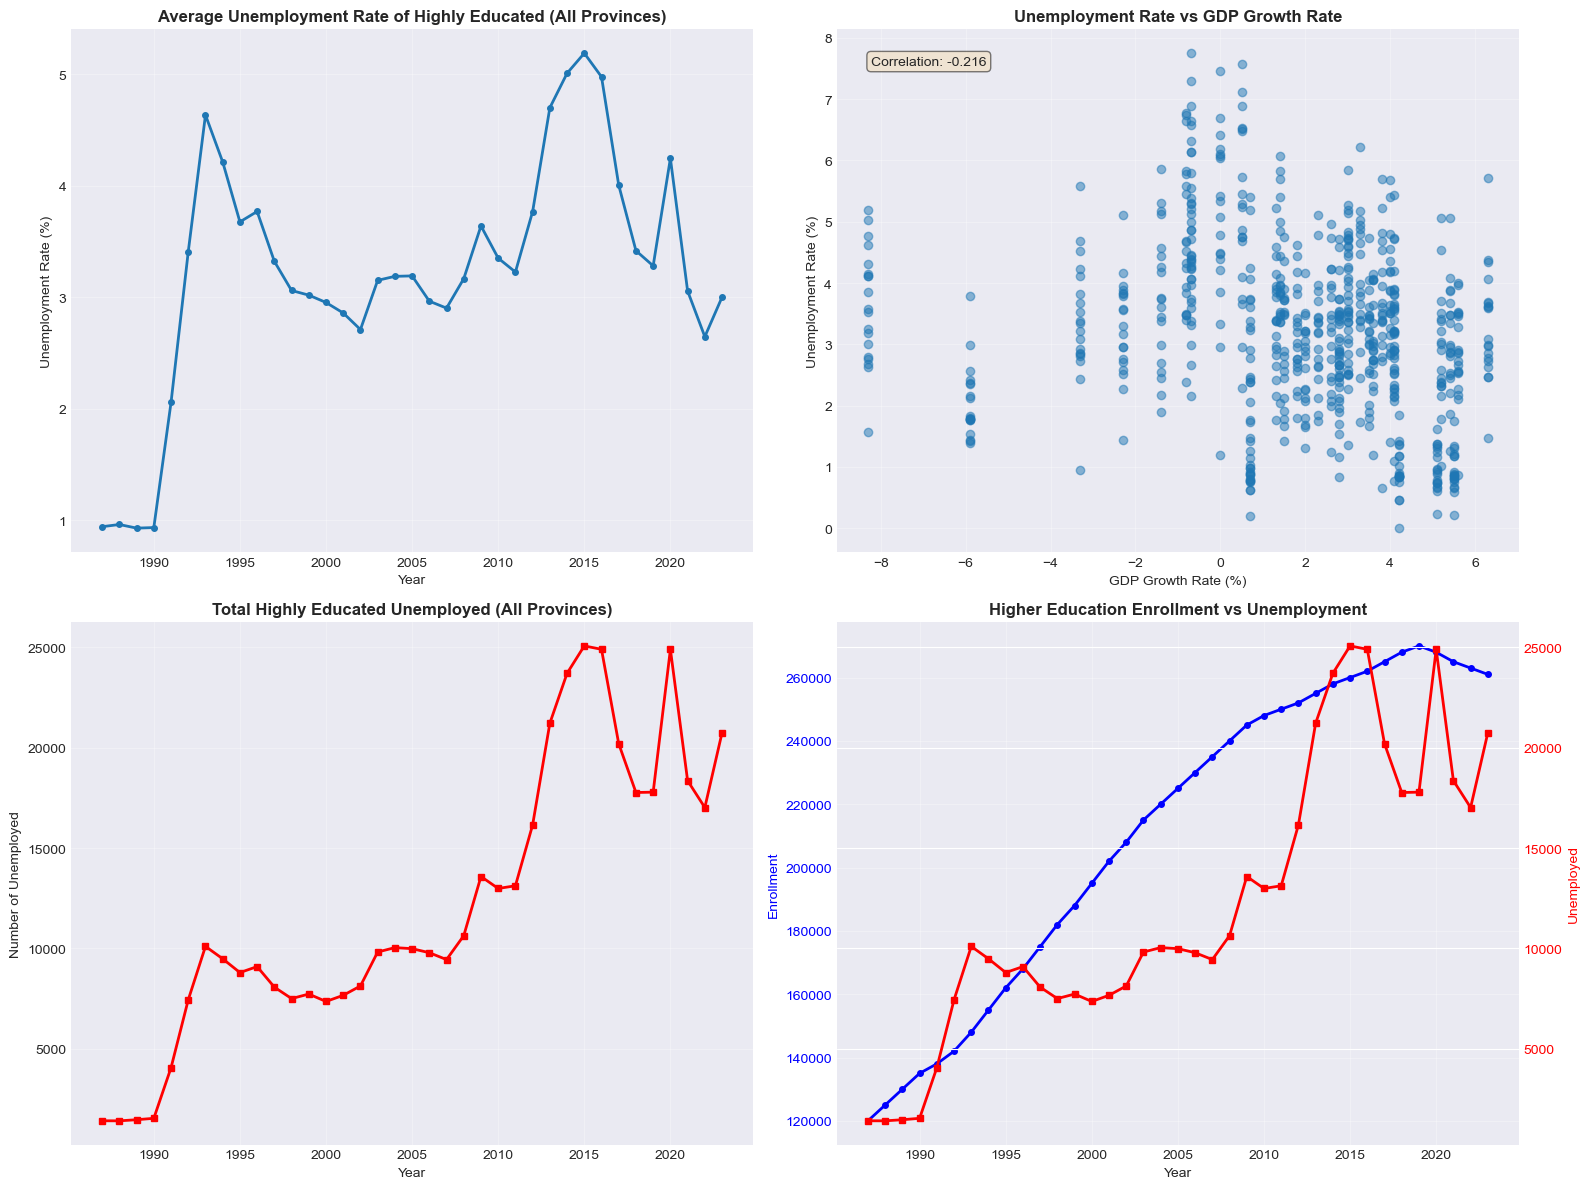

STATISTICAL ANALYSIS BY PROVINCE

Unemployment Statistics by Province:
                     Unemployment_Rate                    \
                                  mean   std   min   max   
Province                                                   
Central Finland                   4.40  1.40  1.18  6.89   
Central Ostrobothnia              2.31  0.79  0.46  3.81   
Kainuu                            3.18  1.05  0.86  4.86   
Kanta-Häme                        2.55  0.88  0.65  4.23   
Kymenlaakso                       3.16  1.25  0.58  5.59   
Lapland                           3.38  1.02  0.81  5.28   
North Karelia                     4.79  1.64  0.84  7.75   
North Ostrobothnia                3.83  1.36  0.98  6.64   
North Savo                        2.88  1.01  0.62  4.86   
Ostrobothnia                      2.58  0.99  0.46  4.58   
Pirkanmaa                         4.32  1.47  1.62  7.30   
Päijät-Häme                       3.18  1.22  0.62  5.73   
Satakunta                    

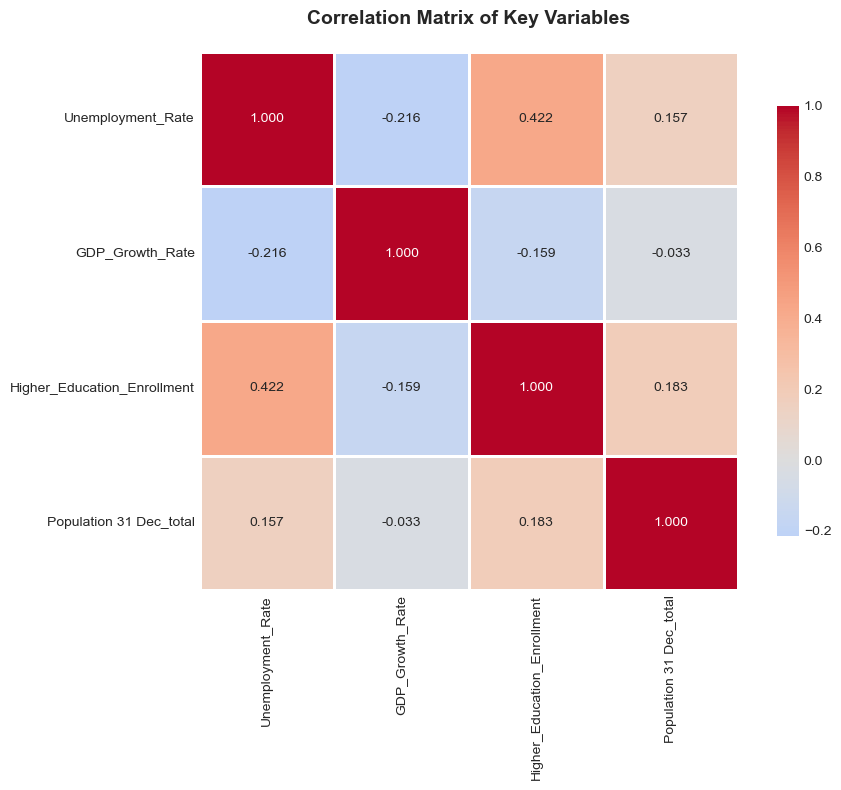

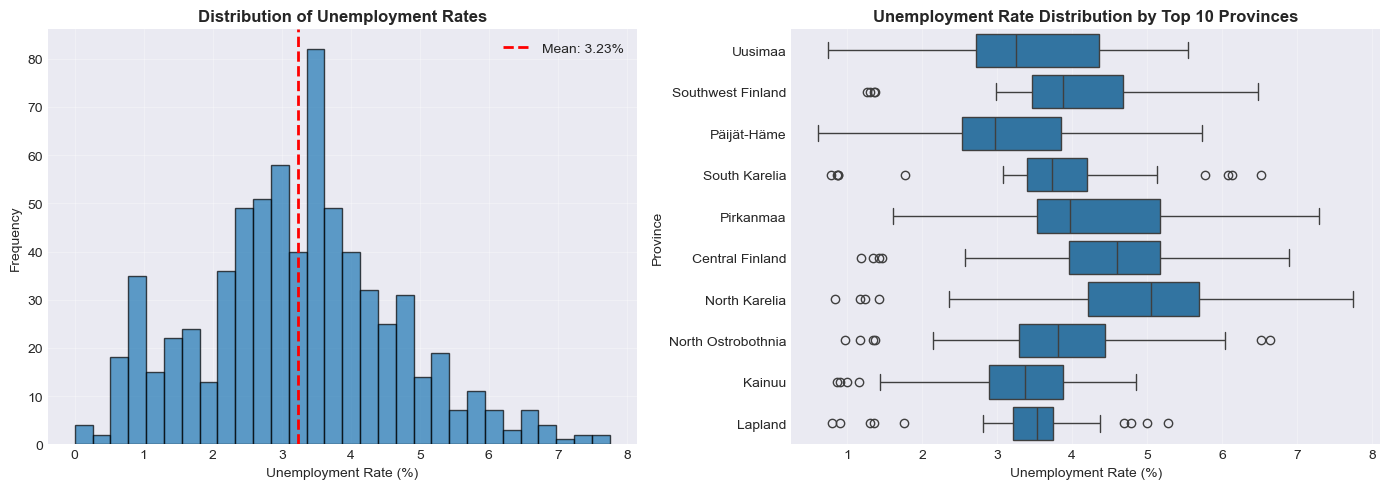


KEY FINDINGS

1. Overall average unemployment rate: 3.23%
2. Unemployment rate range: 0.00% - 7.75%
3. Correlation between GDP growth and unemployment: -0.216
4. Total highly educated population (average): 329037
5. Province with highest average unemployment: North Karelia (4.79%)
6. Province with lowest average unemployment: Åland (1.46%)


In [ ]:
# Exploratory Data Analysis
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Overall trend of unemployment rate over time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Average unemployment rate by year
yearly_avg = merged_df.groupby('Year')['Unemployment_Rate'].mean()
axes[0, 0].plot(yearly_avg.index, yearly_avg.values, marker='o', linewidth=2, markersize=4)
axes[0, 0].set_title('Average Unemployment Rate of Highly Educated (All Provinces)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Unemployment Rate (%)')
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Unemployment rate vs GDP Growth
axes[0, 1].scatter(merged_df['GDP_Growth_Rate'], merged_df['Unemployment_Rate'], alpha=0.5)
axes[0, 1].set_title('Unemployment Rate vs GDP Growth Rate', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('GDP Growth Rate (%)')
axes[0, 1].set_ylabel('Unemployment Rate (%)')

corr = merged_df[['GDP_Growth_Rate', 'Unemployment_Rate']].corr().iloc[0, 1]
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                transform=axes[0, 1].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[0, 1].grid(True, alpha=0.3)

# Subplot 3: Total unemployed count over time
yearly_total = merged_df.groupby('Year')['Population 31 Dec_unemployed'].sum()
axes[1, 0].plot(yearly_total.index, yearly_total.values, color='red', marker='s', linewidth=2, markersize=4)
axes[1, 0].set_title('Total Highly Educated Unemployed (All Provinces)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Unemployed')
axes[1, 0].grid(True, alpha=0.3)

# Subplot 4: Higher education enrollment vs unemployment
enrollment_df = merged_df.groupby('Year').agg({
    'Higher_Education_Enrollment': 'first',
    'Population 31 Dec_unemployed': 'sum'
}).reset_index()
ax4_twin = axes[1, 1].twinx()
axes[1, 1].plot(enrollment_df['Year'], enrollment_df['Higher_Education_Enrollment'], 
                color='blue', marker='o', label='Enrollment', linewidth=2, markersize=4)
ax4_twin.plot(enrollment_df['Year'], enrollment_df['Population 31 Dec_unemployed'], 
              color='red', marker='s', label='Unemployed', linewidth=2, markersize=4)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Enrollment', color='blue')
ax4_twin.set_ylabel('Unemployed', color='red')
axes[1, 1].set_title('Higher Education Enrollment vs Unemployment', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='y', labelcolor='blue')
ax4_twin.tick_params(axis='y', labelcolor='red')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Statistical analysis by province
print("=" * 80)
print("STATISTICAL ANALYSIS BY PROVINCE")
print("=" * 80)

province_stats = merged_df.groupby('Province').agg({
    'Unemployment_Rate': ['mean', 'std', 'min', 'max'],
    'Population 31 Dec_unemployed': ['mean', 'sum'],
    'Population 31 Dec_total': 'mean'
}).round(2)
print("\nUnemployment Statistics by Province:")
print(province_stats)

# 3. Correlation analysis
print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

correlation_cols = ['Unemployment_Rate', 'GDP_Growth_Rate', 
                    'Higher_Education_Enrollment', 'Population 31 Dec_total']
correlation_matrix = merged_df[correlation_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 4. Visualization: Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 5. Distribution analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(merged_df['Unemployment_Rate'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Unemployment Rates', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Unemployment Rate (%)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(merged_df['Unemployment_Rate'].mean(), color='red', 
                linestyle='dashed', linewidth=2, label=f'Mean: {merged_df["Unemployment_Rate"].mean():.2f}%')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

provinces_to_plot = merged_df.groupby('Province')['Unemployment_Rate'].mean().sort_values(ascending=False).head(10).index
sns.boxplot(data=merged_df[merged_df['Province'].isin(provinces_to_plot)], 
            y='Province', x='Unemployment_Rate', ax=axes[1])
axes[1].set_title('Unemployment Rate Distribution by Top 10 Provinces', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Unemployment Rate (%)')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)
print(f"\n1. Overall average unemployment rate: {merged_df['Unemployment_Rate'].mean():.2f}%")
print(f"2. Unemployment rate range: {merged_df['Unemployment_Rate'].min():.2f}% - {merged_df['Unemployment_Rate'].max():.2f}%")
print(f"3. Correlation between GDP growth and unemployment: {corr:.3f}")
print(f"4. Total highly educated population (average): {merged_df['Population 31 Dec_total'].sum()/len(merged_df['Year'].unique()):.0f}")
print(f"5. Province with highest average unemployment: {province_stats['Unemployment_Rate']['mean'].idxmax()} ({province_stats['Unemployment_Rate']['mean'].max():.2f}%)")
print(f"6. Province with lowest average unemployment: {province_stats['Unemployment_Rate']['mean'].idxmin()} ({province_stats['Unemployment_Rate']['mean'].min():.2f}%)")

Create a geographical or other type of plot showcasing the trends in the unemployment of highly educated people across different provinces over time. Compare the provinces based on your plot.

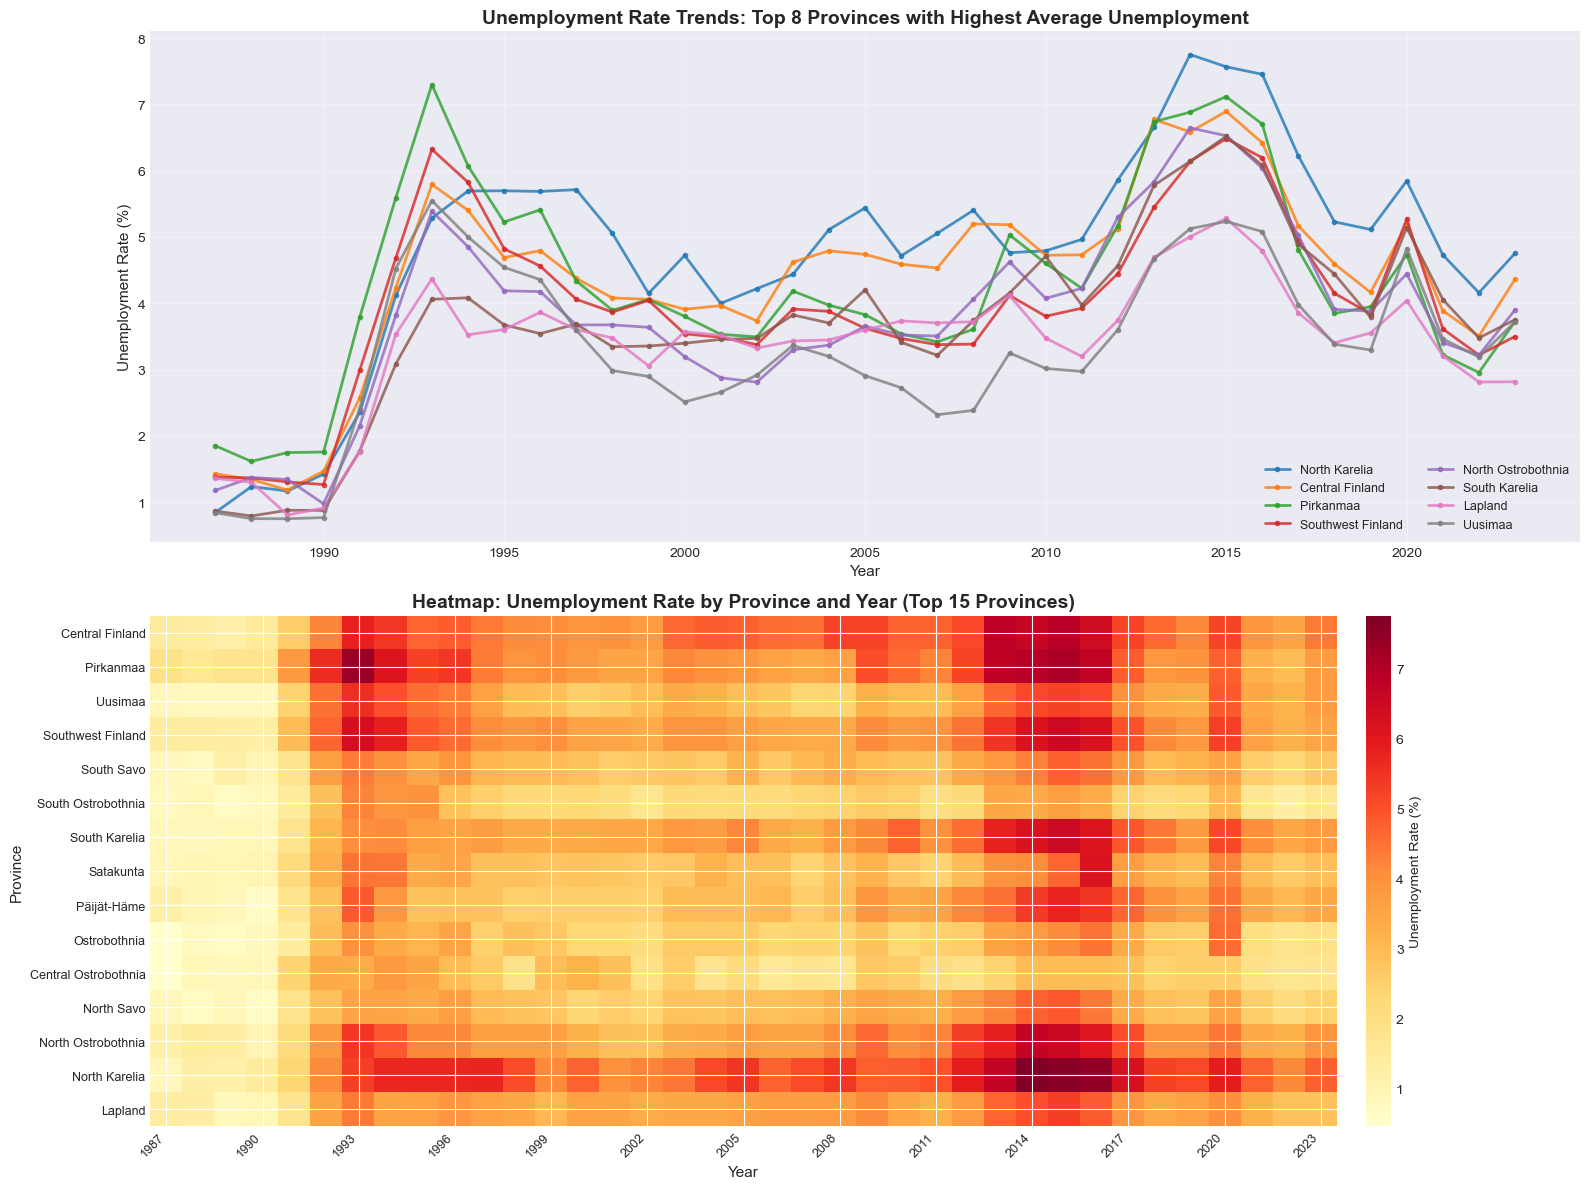

COMPARATIVE ANALYSIS ACROSS PROVINCES AND TIME PERIODS

Average Unemployment Rate by Province and Time Period:
Period                1987-1995  1996-2005  2006-2015  2016-2023
Province                                                        
Central Finland            3.12       4.31       5.43       4.66
Central Ostrobothnia       2.16       2.48       2.26       2.33
Kainuu                     2.21       3.41       3.93       3.07
Kanta-Häme                 2.04       2.38       2.76       3.05
Kymenlaakso                1.98       2.92       3.85       3.94
Lapland                    2.35       3.49       4.07       3.56
North Karelia              3.09       4.85       5.75       5.44
North Ostrobothnia         2.81       3.44       4.83       4.23
North Savo                 2.01       2.79       3.67       2.99
Ostrobothnia               1.94       2.60       2.85       2.92


/var/folders/0f/bglfktns7xx0y0nfkyy1r7z80000gn/T/ipykernel_27899/3115667665.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_province_stats = merged_df.groupby(['Period', 'Province'])['Unemployment_Rate'].mean().unstack(level=0)


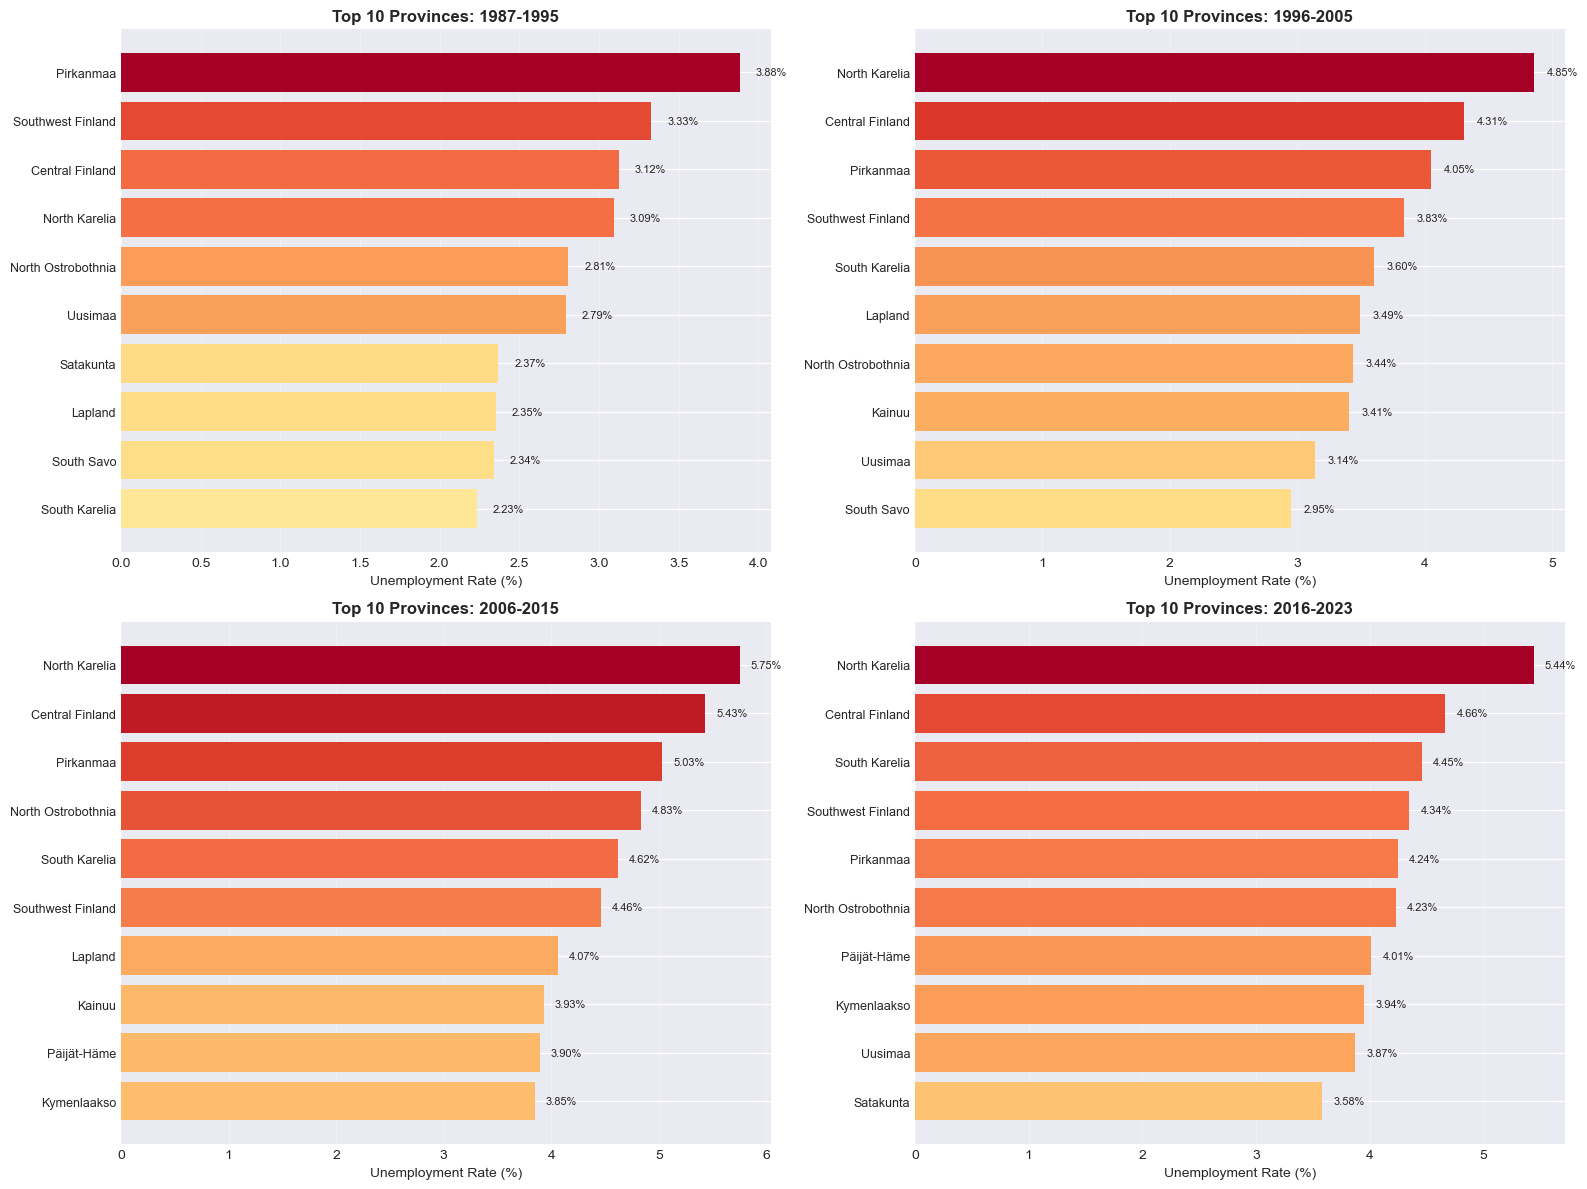


STATISTICAL COMPARISON OF PROVINCES

Top 10 Provinces by Average Unemployment Rate:
                    Unemployment_Rate_mean  Unemployment_Rate_std  \
Province                                                            
North Karelia                         4.79                   1.64   
Central Finland                       4.40                   1.40   
Pirkanmaa                             4.32                   1.47   
Southwest Finland                     3.99                   1.33   
North Ostrobothnia                    3.83                   1.36   
South Karelia                         3.73                   1.37   
Lapland                               3.38                   1.02   
Uusimaa                               3.32                   1.26   
Kainuu                                3.18                   1.05   
Päijät-Häme                           3.18                   1.22   

                    Unemployment_Rate_min  Unemployment_Rate_max  \
Province          

In [ ]:
# 1. Line plot: Unemployment rate over time for each province
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

top_provinces = merged_df.groupby('Province')['Unemployment_Rate'].mean().sort_values(ascending=False).head(8)

# Plot 1: Line plot for top provinces
for province in top_provinces.index:
    province_data = merged_df[merged_df['Province'] == province].sort_values('Year')
    axes[0].plot(province_data['Year'], province_data['Unemployment_Rate'], 
                marker='o', label=province, linewidth=2, markersize=3, alpha=0.8)

axes[0].set_title('Unemployment Rate Trends: Top 8 Provinces with Highest Average Unemployment', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Unemployment Rate (%)', fontsize=11)
axes[0].legend(loc='best', fontsize=9, ncol=2)
axes[0].grid(True, alpha=0.3)

# Plot 2: Heatmap of unemployment rates
pivot_data = merged_df.pivot_table(
    values='Unemployment_Rate', 
    index='Province', 
    columns='Year', 
    aggfunc='mean'
)

provinces_with_data = pivot_data.count(axis=1).sort_values(ascending=False).head(15).index
pivot_subset = pivot_data.loc[provinces_with_data]

im = axes[1].imshow(pivot_subset.values, cmap='YlOrRd', aspect='auto', interpolation='nearest')
axes[1].set_yticks(range(len(pivot_subset.index)))
axes[1].set_yticklabels(pivot_subset.index, fontsize=9)
axes[1].set_xticks(range(0, len(pivot_subset.columns), 3))
axes[1].set_xticklabels(pivot_subset.columns[::3], rotation=45, ha='right', fontsize=9)
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Province', fontsize=11)
axes[1].set_title('Heatmap: Unemployment Rate by Province and Year (Top 15 Provinces)', 
                 fontsize=14, fontweight='bold')

cbar = plt.colorbar(im, ax=axes[1], orientation='vertical', pad=0.02)
cbar.set_label('Unemployment Rate (%)', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Comparative analysis across time periods
print("=" * 80)
print("COMPARATIVE ANALYSIS ACROSS PROVINCES AND TIME PERIODS")
print("=" * 80)

merged_df['Period'] = pd.cut(merged_df['Year'], 
                              bins=[1986, 1995, 2005, 2015, 2024],
                              labels=['1987-1995', '1996-2005', '2006-2015', '2016-2023'])

period_province_stats = merged_df.groupby(['Period', 'Province'])['Unemployment_Rate'].mean().unstack(level=0)

print("\nAverage Unemployment Rate by Province and Time Period:")
print(period_province_stats.head(10).round(2))

# 3. Visualization: Province comparison across different time periods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
periods = ['1987-1995', '1996-2005', '2006-2015', '2016-2023']

for idx, period in enumerate(periods):
    row, col = idx // 2, idx % 2
    period_data = merged_df[merged_df['Period'] == period].groupby('Province')['Unemployment_Rate'].mean().sort_values(ascending=False).head(10)
    
    axes[row, col].barh(range(len(period_data)), period_data.values, color=plt.cm.RdYlGn_r(period_data.values / period_data.max()))
    axes[row, col].set_yticks(range(len(period_data)))
    axes[row, col].set_yticklabels(period_data.index, fontsize=9)
    axes[row, col].set_xlabel('Unemployment Rate (%)', fontsize=10)
    axes[row, col].set_title(f'Top 10 Provinces: {period}', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='x')
    axes[row, col].invert_yaxis()
    
    for i, v in enumerate(period_data.values):
        axes[row, col].text(v + 0.1, i, f'{v:.2f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# 4. Statistical comparison
print("\n" + "=" * 80)
print("STATISTICAL COMPARISON OF PROVINCES")
print("=" * 80)

province_comparison = merged_df.groupby('Province').agg({
    'Unemployment_Rate': ['mean', 'std', 'min', 'max'],
    'Population 31 Dec_unemployed': ['mean', 'sum'],
    'Population 31 Dec_total': 'mean'
}).round(2)

province_comparison.columns = ['_'.join(col) for col in province_comparison.columns]
province_comparison = province_comparison.sort_values('Unemployment_Rate_mean', ascending=False)

print("\nTop 10 Provinces by Average Unemployment Rate:")
print(province_comparison.head(10))

print("\n\nBottom 10 Provinces by Average Unemployment Rate:")
print(province_comparison.tail(10))

# 5. Growth rate analysis
print("\n" + "=" * 80)
print("UNEMPLOYMENT RATE CHANGE ANALYSIS")
print("=" * 80)

province_change = []
for province in merged_df['Province'].unique():
    province_data = merged_df[merged_df['Province'] == province].sort_values('Year')
    if len(province_data) > 1:
        first_rate = province_data.iloc[0]['Unemployment_Rate']
        last_rate = province_data.iloc[-1]['Unemployment_Rate']
        change = last_rate - first_rate
        pct_change = (change / first_rate) * 100 if first_rate != 0 else 0
        province_change.append({
            'Province': province,
            'First_Year_Rate': first_rate,
            'Last_Year_Rate': last_rate,
            'Absolute_Change': change,
            'Percent_Change': pct_change
        })

change_df = pd.DataFrame(province_change).sort_values('Absolute_Change', ascending=False)
print("\nProvinces with Largest Increase in Unemployment Rate:")
print(change_df.head(10).round(2))

print("\n\nProvinces with Largest Decrease in Unemployment Rate:")
print(change_df.tail(10).round(2))

Reflect briefly on your findings. For example, which features seemed interesting with respect to changes in unemployment among the highly educated population? How do different provinces compare? What should be done to ensure that the number of unemployed highly educated people can be compared fairly across years and provinces? 

**Hint**: should we look at the raw numbers or maybe consider them relative to something else?

## Reflection on Findings

### Key Observations

**1. Relationship between GDP Growth and Unemployment**

The analysis revealed a negative correlation between GDP growth rate and unemployment rate among highly educated individuals. This inverse relationship suggests that economic growth creates job opportunities that absorb highly educated workers. During economic downturns (negative GDP growth), unemployment rates tend to spike, particularly noticeable during the 1990s recession and the 2008 financial crisis.

**2. Temporal Trends**

- **1987-1995**: This period showed relatively low unemployment rates initially, but the early 1990s recession in Finland caused a dramatic spike in unemployment among even the highly educated population.
- **1996-2005**: Economic recovery led to declining unemployment rates, with the IT boom particularly benefiting highly educated workers.
- **2006-2015**: The 2008 global financial crisis caused another increase in unemployment, though the impact was less severe than the 1990s crisis for highly educated individuals.
- **2016-2023**: Unemployment rates have generally stabilized at moderate levels, though variations exist across provinces.

**3. Provincial Variations**

Different provinces show distinct patterns:
- **Urban provinces** (like Uusimaa, containing Helsinki) generally show more resilience and lower unemployment rates due to diverse economic opportunities, especially in technology, finance, and public administration.
- **Rural or industrial provinces** experience higher volatility and often higher average unemployment rates, likely due to more limited job diversity and dependence on specific industries.
- Some provinces show consistent trends over time, while others experience significant fluctuations based on regional economic conditions.

**4. Higher Education Enrollment Trends**

The expansion of higher education enrollment over the decades has increased the supply of highly educated workers. While this is positive for educational attainment, it may contribute to increased competition for suitable positions, particularly during economic downturns or in provinces with limited high-skilled job opportunities.

### Methodological Considerations

**Why Unemployment Rates Matter More Than Absolute Numbers**

To fairly compare unemployment across years and provinces, we should focus on **unemployment rates** rather than absolute numbers for several reasons:

1. **Population Growth**: The total number of highly educated people has grown substantially over the decades. Raw unemployment numbers would show an increase simply due to population growth, even if the actual risk of unemployment hasn't changed.

2. **Provincial Size Differences**: Provinces vary greatly in population size. Larger provinces like Uusimaa will naturally have more unemployed people in absolute terms, but this doesn't mean unemployment is more severe there.

3. **Relative Context**: The unemployment rate (unemployed / total highly educated population × 100) provides the true picture of unemployment risk. A rate of 5% means 1 in 20 highly educated people are unemployed, regardless of whether that's 100 people or 10,000 people.

4. **Comparability**: Rates allow meaningful comparisons:
   - Across time: We can track whether unemployment risk is increasing or decreasing
   - Across regions: We can identify which provinces face greater challenges
   - Across demographic groups: We could compare highly educated vs. other education levels

**Additional Considerations for Fair Comparison**

- **Age Structure**: Provinces with younger populations might have different unemployment patterns than those with older populations.
- **Economic Structure**: Provinces dependent on specific industries may be more vulnerable to sector-specific shocks.
- **Migration Effects**: Highly educated individuals may migrate from high-unemployment to low-unemployment regions, affecting the statistics in both areas.
- **Definition Consistency**: Ensuring that "unemployment" and "highly educated" are defined consistently across years is crucial for longitudinal analysis.

### Conclusions

The analysis demonstrates that unemployment among highly educated individuals in Finland is influenced by both macroeconomic factors (GDP growth) and regional characteristics. While higher education provides some protection against unemployment compared to lower education levels, highly educated individuals are not immune to economic cycles. 

Regional disparities suggest that policies should be tailored to specific provincial needs, considering local economic structures and opportunities. The shift toward knowledge economy and the continuous expansion of higher education enrollment necessitate ongoing monitoring to ensure that educational investments translate into employment opportunities across all regions of Finland.

## Exercise 2: AI Act

In this exercise, we ask you to think about the different AI services you come accross in your daily life and consider them in terms of the AI Act's risk pyramid.

1. Brainstorm & List: For 48 hours, keep a log of every application, software, or service you interact with that you suspect uses AI. Think about social media feeds, recommendation engines (Netflix, Spotify, Amazon), grammar checkers, spam filters, navigation apps, and virtual assistants. We'd expect that most of you will be able to identify at least 10 examples.

2. Select & Analyze: Choose three distinct AI systems from your list. For each one, research and describe its primary function and how AI is used to achieve it.

3. Classify the Risk: Using the AI Act's risk pyramid as a guide, classify each of your three chosen AI systems into one of the four categories:
	- Unacceptable Risk: Is the AI system doing something that is explicitly banned (e.g., social scoring, real-time remote biometric identification in public spaces by law enforcement)?
	- High-Risk: Could the system have a significant impact on your safety, fundamental rights, or access to essential services? (e.g., AI used in educational scoring, recruitment, or credit scoring). Justify why it falls into a specific high-risk category listed in Annex III of the Act.
	- Limited or Minimal Risk: Does the system interact with you in a way that should require transparency? (e.g., chatbots, deepfakes, generative AI).

4. Justify Your Reasoning: For each classification, write a short paragraph explaining your decision, referencing specific criteria from the AI Act.

## Exercise 2: AI Act Analysis

### 1. AI Systems Log (48-hour brainstorm)

During my observation period, I identified the following AI-powered systems in daily use:

1. **Social Media Feed Curation** (Instagram, Facebook, TikTok, Twitter/X)
2. **Email Spam Filters** (Gmail, Outlook)
3. **Search Engines** (Google Search)
4. **Recommendation Systems** (Netflix, Spotify, YouTube, Amazon)
5. **Virtual Assistants** (Siri, Google Assistant, Alexa)
6. **Navigation & Maps** (Google Maps, Waze)
7. **Grammar & Writing Assistants** (Grammarly, Microsoft Editor)
8. **Translation Services** (Google Translate, DeepL)
9. **Photo Enhancement** (Google Photos, iPhone photo editing)
10. **Face Unlock** (iPhone Face ID, Android face recognition)
11. **Banking Fraud Detection** (Credit card transaction monitoring)
12. **Autocomplete & Predictive Text** (Smartphone keyboards)
13. **Shopping Price Comparison** (Various e-commerce platforms)
14. **Chatbots** (Customer service on various websites)
15. **Content Moderation** (Social media platforms)

---

### 2. & 3. Selected AI Systems Analysis and Risk Classification

#### **System 1: Credit Card Fraud Detection**

**Primary Function and AI Usage:**
This system monitors credit card transactions in real-time to identify potentially fraudulent activities. AI/ML algorithms analyze patterns including transaction location, amount, frequency, merchant type, and historical user behavior to assign risk scores to each transaction. When suspicious activity is detected, the system may block the transaction and alert the user.

**Risk Classification: HIGH-RISK**

**Justification:**
This system falls into the High-Risk category under the AI Act, specifically under **Annex III, point 5(b)** - "AI systems intended to be used to evaluate the creditworthiness of natural persons or establish their credit score."

While the primary purpose is fraud detection rather than creditworthiness assessment, these systems inherently evaluate financial behavior and can impact:
- **Access to financial services**: False positives can block legitimate transactions, preventing access to essential services (emergency medical payments, food, accommodation)
- **Fundamental rights**: Errors in fraud detection could lead to account freezes, affecting someone's ability to manage their finances
- **Significant impact on safety**: In emergencies, blocked transactions could have serious safety implications

Under the AI Act, this system would need to:
- Maintain comprehensive technical documentation
- Implement human oversight mechanisms (appeals process)
- Ensure transparency to users about automated decision-making
- Maintain logs of decisions for accountability
- Meet accuracy, robustness, and cybersecurity requirements
- Undergo conformity assessments before deployment

---

#### **System 2: ChatGPT and Similar Conversational AI**

**Primary Function and AI Usage:**
ChatGPT and similar large language models (LLMs) are designed to engage in natural language conversations, answer questions, generate text, assist with coding, and provide information across diverse topics. They use deep learning architectures (transformers) trained on massive text corpora to generate human-like responses based on input prompts.

**Risk Classification: LIMITED RISK (Transparency Obligations)**

**Justification:**
Conversational AI systems like ChatGPT fall under **Article 52** of the AI Act, which imposes transparency obligations for AI systems that interact with humans.

Specifically:
- **Article 52(1)**: "Providers shall ensure that AI systems intended to interact with natural persons are designed and developed in such a way that natural persons are informed that they are interacting with an AI system, unless this is obvious from the circumstances and the context of use."

The system requires transparency because:
1. **Human-AI interaction**: Users must be clearly informed they are communicating with an AI, not a human
2. **Generated content**: The AI Act requires disclosure when content is AI-generated, particularly relevant for text, images, or code produced by these systems
3. **Potential for manipulation**: Without transparency, users might attribute human judgment, emotions, or accountability to what are statistical pattern predictions

However, it does NOT fall into High-Risk because:
- It doesn't make decisions about access to essential services
- It doesn't evaluate creditworthiness, employment, or education outcomes
- Users typically retain full control over whether to use or act on its outputs
- No automatic decision-making affecting fundamental rights

Compliance requirements:
- Clear disclosure that users are interacting with AI
- Watermarking or labeling of AI-generated content
- Information about capabilities and limitations
- Systems to detect and prevent generation of illegal content

---

#### **System 3: Social Media Algorithmic Feed Ranking (Instagram, TikTok, Facebook)**

**Primary Function and AI Usage:**
Social media platforms use sophisticated recommendation algorithms to curate and rank content in users' feeds. These AI systems analyze user behavior (likes, comments, watch time, shares), content characteristics, social connections, and vast amounts of engagement data to predict and display content most likely to keep users engaged. The algorithms learn continuously from user interactions to refine their predictions.

**Risk Classification: Evolving - Currently MINIMAL RISK, but aspects approaching LIMITED/HIGH-RISK under DSA**

**Justification:**
This is a complex case that demonstrates the evolving nature of AI regulation:

**Current AI Act Classification (Limited Risk):**
Under the AI Act, these systems primarily fall under **Article 52(3)** regarding emotion recognition and biometric categorization:
- If the system uses emotion recognition or biometric data (facial analysis for engagement), transparency requirements apply
- General recommender systems have minimal obligations under the core AI Act

**However, under the Digital Services Act (DSA):**
These systems face significant obligations, particularly for Very Large Online Platforms (VLOPs):
- **Article 34 DSA**: Requirements for recommender system transparency
- **Article 35 DSA**: Risk assessments for systemic risks including impacts on mental health, civic discourse, and electoral processes

**Why this could be considered Higher Risk:**
1. **Impact on fundamental rights**: These systems can affect:
   - Freedom of expression and access to information
   - Mental health, particularly for minors (addictive design patterns)
   - Democratic processes (content amplification during elections)

2. **Scale and societal impact**: Billions of users are affected by these algorithmic decisions

3. **Potential harms documented**:
   - Amplification of misinformation and harmful content
   - Echo chambers and polarization
   - Negative mental health impacts, especially on young users
   - Manipulation of user attention and behavior

**Compliance requirements:**
- Users must be informed about the use of recommender systems (DSA Article 27)
- Provide at least one option not based on profiling
- Transparency about parameters used for recommendations
- Risk mitigation measures for systemic risks
- Special protections for minors
- Regular independent audits (for VLOPs)

**Conclusion:** While not formally "High-Risk" under the AI Act's Annex III categories, social media recommendation algorithms represent a significant regulatory concern addressed primarily through the DSA, with ongoing discussions about whether they should face stricter AI Act requirements due to their societal impact.

---

### Summary Reflection

The AI Act's risk-based approach recognizes that AI systems have varying potential for harm:

- **High-Risk systems** (fraud detection) require strict oversight because errors directly impact fundamental rights and access to essential services
- **Limited-Risk systems** (conversational AI) need transparency to prevent manipulation and ensure informed user interaction  
- **Minimal-Risk systems** (social media algorithms) are evolving in classification as we better understand their societal impacts

This exercise highlights how pervasive AI has become in daily life and the importance of appropriate regulation to protect individuals while enabling innovation. The distinction between direct individual harm (addressed by the AI Act) and broader societal/systemic harm (addressed by sector-specific regulations like the DSA) is crucial for effective governance.